## Kernel Logistic Regression

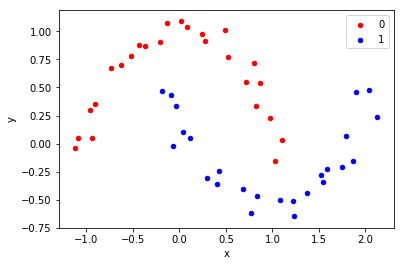

          0         1  y
0  0.079327  1.041847  0
1  1.743675 -0.211736  1
2  0.244200  0.977127  0
3  0.979753  0.231667  0
4 -0.960446  0.298004  0
Training Started . .
Linear LR
Using SGD with eta: 0.001  and maxIter:  1000

Training Completed.

Trained Model alpha values of first 5 training data and bias
-------------------------------------------------------------
Traing Data[ 0 ]= -0.005771076245389586
Traing Data[ 1 ]= -0.005771076245389586
Traing Data[ 2 ]= -0.005771076245389586
Traing Data[ 3 ]= -0.005771076245389586
Traing Data[ 4 ]= -0.005771076245389586

Bias = -0.005771076245389586
-------------------------------------------------------------
Evaluating model accuracy on training data

Accuracy = 0.55

-------------------------------------------------------------
Evaluating model accuracy on test data
----------------
input=(-0.6295423702473448,0.6990656272996131)
Actual value =0.0
Calculated y =0.4411209140765826
Predicted value=0
Result = Correct
----------------
-------

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from math import exp
import random
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.model_selection import train_test_split

from random import seed
from random import randrange


def rbf():
    print(lst.head())
    iter = 0
    maxIter = 1000
    indices =list(range(numTrain))
    #Kernel Matrix
    kernelMatrix = [0.0 for i in range(numTrain)]
    for i in range(len(kernelMatrix)):
        kernelMatrix[i]=[0.0 for i in range(numTrain)]

    #RBF Kernel   
    def Kernel(v1,v2,sigma):
        num = 0.0
        for i in range(len(v1)-1):
            num+=(v1[i]-v2[i]) * (v1[i]-v2[i])
        denom = 2.0 * sigma * sigma
        z = num / denom
        return(exp(-z))


    for i in range(numTrain):
        for j in range(numTrain):
            k = Kernel(trainData[i],trainData[j],sigma)
            kernelMatrix[i][j] = kernelMatrix[j][i] = k



    #Shuffle to scrambel the order of training data
    def Shuffle(indices):
        for i in range(len(indices)):
            ri = random.randint(i,len(indices) - 1) 
            tmp = indices[i]
            indices[i] = indices[ri]
            indices[ri] = tmp

    def Accuracy(data,trainData,alphas,sigma,verbose):
        numCorrect = 0
        numWrong = 0
        numTrain = len(trainData)
        numFeatures = len(trainData[0])-1
        for i in range(len(data)):
            sum = 0.0
            for j in range(len(alphas)-1):
                k = Kernel(data[i],trainData[j],sigma)
                sum += alphas[j] * k
            sum += alphas[len(alphas)-1] * 1
            y = 1.0/(1.0+exp(-sum))
            t = data[i][numFeatures]
            pred = 0
            if y > 0.5:
                pred = 1            
            if verbose:
                print("----------------")
                print("input=(",end="")
                for j in range(len(data[i])-2):
                    print(data[i][j],end="")
                    print(",",end="")
                print(data[i][len(data[i])-2],end="")
                print(")")
                print("Actual value =",end="")
                print(t)
                print("Calculated y =",end="")
                print(y)
                print("Predicted value=",end="")
                print(pred)
                if y<=0.5 and t==0.0 or y>0.5 and t==1.0:
                    numCorrect+=1
                    print("Result = Correct")
                    print("----------------")
                else:
                    numWrong+=1
                    print("Result = Wrong")
                    print("----------------")

            else:
                if y<=0.5 and t==0.0 or y>0.5 and t==1.0:
                    numCorrect+=1
                else:
                    numWrong+=1
        if verbose:
            print("Number of correct predictions = ",end="")
            print(numCorrect)
            print("Number of wrong predictions = ",end="")
            print(numWrong)
        return((1.0*numCorrect) / (numCorrect+numWrong))

    print("Training Started . .")
    print("Kernel: RBF")
    print("Sigma: ",sigma)
    print("Using SGD with eta:",eta," and maxIter: ",maxIter)

    while iter < maxIter:
        Shuffle(indices)
        for idx in range(len(indices)):
            i = indices[idx]
            sum = 0.0
            for j in range(len(alphas)-1):
                sum += alphas[j] * kernelMatrix[i][j]
            sum += alphas[len(alphas)-1]
            y = 1.0/(1.0+exp(-sum))
            t = trainData[i][numFeatures]
            for j in range(len(alphas)-1):
                alphas[j] = alphas[j] + (eta * (t-y) * kernelMatrix[i][j])
            alphas[len(alphas)-1] = alphas[len(alphas)-1] + (eta * (t - y)) * 1
        iter += 1

    print("")
    print("Training Completed.")
    print("")
    print("Trained Model alpha values of first 5 training data and bias")
    print("-------------------------------------------------------------")
    for i in range(5):
        print("Traing Data[",i,"]= ",end="")
        print(alphas[i])

    print("")
    print("Bias = ",end="")
    print(alphas[numTrain])
    print("-------------------------------------------------------------")
    print("Evaluating model accuracy on training data")
    print("")
    accTrain = Accuracy(trainData,trainData,alphas,sigma,0) #0 = false
    print("Accuracy = ",end="")
    print(accTrain)
    print("")
    print("-------------------------------------------------------------")
    print("Evaluating model accuracy on test data")
    accTest = Accuracy(testData,trainData,alphas,sigma,1) # 1 for true verbose
    print("Accuracy = ",end="")
    print(accTest)
    all_acc[0]=accTest
    print("-------------------------------------------------------------")

    
    
def polynomial():
    print(lst.head())
    iter = 0
    maxIter = 1000
    indices =list(range(numTrain))
    #Kernel Matrix
    kernelMatrix = [0.0 for i in range(numTrain)]
    for i in range(len(kernelMatrix)):
        kernelMatrix[i]=[0.0 for i in range(numTrain)]

    #Polynomial Kernel   
    def Kernel(v1,v2,sigma):
        return (p_gamma*np.dot(v1,v2) + p_r)**p_degree



    for i in range(numTrain):
        for j in range(numTrain):
            k = Kernel(trainData[i],trainData[j],sigma)
            kernelMatrix[i][j] = kernelMatrix[j][i] = k



    #Shuffle to scrambel the order of training data
    def Shuffle(indices):
        for i in range(len(indices)):
            ri = random.randint(i,len(indices) - 1) 
            tmp = indices[i]
            indices[i] = indices[ri]
            indices[ri] = tmp

    def Accuracy(data,trainData,alphas,sigma,verbose):
        numCorrect = 0
        numWrong = 0
        numTrain = len(trainData)
        numFeatures = len(trainData[0])-1
        for i in range(len(data)):
            sum = 0.0
            for j in range(len(alphas)-1):
                k = Kernel(data[i],trainData[j],sigma)
                sum += alphas[j] * k
            sum += alphas[len(alphas)-1] * 1
            y = 1.0/(1.0+exp(-sum))
            t = data[i][numFeatures]
            pred = 0
            if y > 0.5:
                pred = 1            
            if verbose:
                print("----------------")
                print("input=(",end="")
                for j in range(len(data[i])-2):
                    print(data[i][j],end="")
                    print(",",end="")
                print(data[i][len(data[i])-2],end="")
                print(")")
                print("Actual value =",end="")
                print(t)
                print("Calculated y =",end="")
                print(y)
                print("Predicted value=",end="")
                print(pred)
                if y<=0.5 and t==0.0 or y>0.5 and t==1.0:
                    numCorrect+=1
                    print("Result = Correct")
                    print("----------------")
                else:
                    numWrong+=1
                    print("Result = Wrong")
                    print("----------------")

            else:
                if y<=0.5 and t==0.0 or y>0.5 and t==1.0:
                    numCorrect+=1
                else:
                    numWrong+=1
        if verbose:
            print("Number of correct predictions = ",end="")
            print(numCorrect)
            print("Number of wrong predictions = ",end="")
            print(numWrong)
        return((1.0*numCorrect) / (numCorrect+numWrong))

    print("Training Started . .")
    print("Kernel: Polynomial")
    print("Using SGD with eta:",eta," and maxIter: ",maxIter)

    while iter < maxIter:
        Shuffle(indices)
        for idx in range(len(indices)):
            i = indices[idx]
            sum = 0.0
            for j in range(len(alphas)-1):
                sum += alphas[j] * kernelMatrix[i][j]
            sum += alphas[len(alphas)-1]
            y = 1.0/(1.0+exp(-sum))
            t = trainData[i][numFeatures]
            for j in range(len(alphas)-1):
                alphas[j] = alphas[j] + (eta * (t-y) * kernelMatrix[i][j])
            alphas[len(alphas)-1] = alphas[len(alphas)-1] + (eta * (t - y)) * 1
        iter += 1

    print("")
    print("Training Completed.")
    print("")
    print("Trained Model alpha values of first 5 training data and bias")
    print("-------------------------------------------------------------")
    for i in range(5):
        print("Traing Data[",i,"]= ",end="")
        print(alphas[i])

    print("")
    print("Bias = ",end="")
    print(alphas[numTrain])
    print("-------------------------------------------------------------")
    print("Evaluating model accuracy on training data")
    print("")
    accTrain = Accuracy(trainData,trainData,alphas,sigma,0) #0 = false
    print("Accuracy = ",end="")
    print(accTrain)
    print("")
    print("-------------------------------------------------------------")
    print("Evaluating model accuracy on test data")
    accTest = Accuracy(testData,trainData,alphas,sigma,1) # 1 for true verbose
    print("Accuracy = ",end="")
    print(accTest)
    all_acc[1]=accTest
    print("-------------------------------------------------------------")
    
def lr():
    print(lst.head())
    iter = 0
    maxIter = 1000
    indices =list(range(numTrain))
    #Kernel Matrix
    kernelMatrix = [0.0 for i in range(numTrain)]
    for i in range(len(kernelMatrix)):
        kernelMatrix[i]=[0.0 for i in range(numTrain)]

    #Polynomial Kernel   
    def Kernel(v1,v2,sigma):
        return (lr_gamma*np.dot(v1,v2) + lr_r)**lr_degree



    for i in range(numTrain):
        for j in range(numTrain):
            k = Kernel(trainData[i],trainData[j],sigma)
            kernelMatrix[i][j] = kernelMatrix[j][i] = k



    #Shuffle to scrambel the order of training data
    def Shuffle(indices):
        for i in range(len(indices)):
            ri = random.randint(i,len(indices) - 1) 
            tmp = indices[i]
            indices[i] = indices[ri]
            indices[ri] = tmp

    def Accuracy(data,trainData,alphas,sigma,verbose):
        numCorrect = 0
        numWrong = 0
        numTrain = len(trainData)
        numFeatures = len(trainData[0])-1
        for i in range(len(data)):
            sum = 0.0
            for j in range(len(alphas)-1):
                k = Kernel(data[i],trainData[j],sigma)
                sum += alphas[j] * k
            sum += alphas[len(alphas)-1] * 1
            y = 1.0/(1.0+exp(-sum))
            t = data[i][numFeatures]
            pred = 0
            if y > 0.5:
                pred = 1            
            if verbose:
                print("----------------")
                print("input=(",end="")
                for j in range(len(data[i])-2):
                    print(data[i][j],end="")
                    print(",",end="")
                print(data[i][len(data[i])-2],end="")
                print(")")
                print("Actual value =",end="")
                print(t)
                print("Calculated y =",end="")
                print(y)
                print("Predicted value=",end="")
                print(pred)
                if y<=0.5 and t==0.0 or y>0.5 and t==1.0:
                    numCorrect+=1
                    print("Result = Correct")
                    print("----------------")
                else:
                    numWrong+=1
                    print("Result = Wrong")
                    print("----------------")

            else:
                if y<=0.5 and t==0.0 or y>0.5 and t==1.0:
                    numCorrect+=1
                else:
                    numWrong+=1
        if verbose:
            print("Number of correct predictions = ",end="")
            print(numCorrect)
            print("Number of wrong predictions = ",end="")
            print(numWrong)
        return((1.0*numCorrect) / (numCorrect+numWrong))

    print("Training Started . .")
    print("Linear LR")
    print("Using SGD with eta:",eta," and maxIter: ",maxIter)

    while iter < maxIter:
        Shuffle(indices)
        for idx in range(len(indices)):
            i = indices[idx]
            sum = 0.0
            for j in range(len(alphas)-1):
                sum += alphas[j] * kernelMatrix[i][j]
            sum += alphas[len(alphas)-1]
            y = 1.0/(1.0+exp(-sum))
            t = trainData[i][numFeatures]
            for j in range(len(alphas)-1):
                alphas[j] = alphas[j] + (eta * (t-y) * kernelMatrix[i][j])
            alphas[len(alphas)-1] = alphas[len(alphas)-1] + (eta * (t - y)) * 1
        iter += 1

    print("")
    print("Training Completed.")
    print("")
    print("Trained Model alpha values of first 5 training data and bias")
    print("-------------------------------------------------------------")
    for i in range(5):
        print("Traing Data[",i,"]= ",end="")
        print(alphas[i])

    print("")
    print("Bias = ",end="")
    print(alphas[numTrain])
    print("-------------------------------------------------------------")
    print("Evaluating model accuracy on training data")
    print("")
    accTrain = Accuracy(trainData,trainData,alphas,sigma,0) #0 = false
    print("Accuracy = ",end="")
    print(accTrain)
    print("")
    print("-------------------------------------------------------------")
    print("Evaluating model accuracy on test data")
    accTest = Accuracy(testData,trainData,alphas,sigma,1) # 1 for true verbose
    print("Accuracy = ",end="")
    print(accTest)
    all_acc[3]=accTest
    print("-------------------------------------------------------------")



def sigmoid():
    print(lst.head())
    iter = 0
    maxIter = 1000
    indices =list(range(numTrain))
    #Kernel Matrix
    kernelMatrix = [0.0 for i in range(numTrain)]
    for i in range(len(kernelMatrix)):
        kernelMatrix[i]=[0.0 for i in range(numTrain)]

    #sigmoid Kernel   
    def Kernel(v1,v2,sigma):
        return np.tanh(s_gamma*np.dot(v1,v2) + s_r )



    for i in range(numTrain):
        for j in range(numTrain):
            k = Kernel(trainData[i],trainData[j],sigma)
            kernelMatrix[i][j] = kernelMatrix[j][i] = k



    #Shuffle to scrambel the order of training data
    def Shuffle(indices):
        for i in range(len(indices)):
            ri = random.randint(i,len(indices) - 1) 
            tmp = indices[i]
            indices[i] = indices[ri]
            indices[ri] = tmp

    def Accuracy(data,trainData,alphas,sigma,verbose):
        numCorrect = 0
        numWrong = 0
        numTrain = len(trainData)
        numFeatures = len(trainData[0])-1
        for i in range(len(data)):
            sum = 0.0
            for j in range(len(alphas)-1):
                k = Kernel(data[i],trainData[j],sigma)
                sum += alphas[j] * k
            sum += alphas[len(alphas)-1] * 1
            y = 1.0/(1.0+exp(-sum))
            t = data[i][numFeatures]
            pred = 0
            if y > 0.5:
                pred = 1            
            if verbose:
                print("----------------")
                print("input=(",end="")
                for j in range(len(data[i])-2):
                    print(data[i][j],end="")
                    print(",",end="")
                print(data[i][len(data[i])-2],end="")
                print(")")
                print("Actual value =",end="")
                print(t)
                print("Calculated y =",end="")
                print(y)
                print("Predicted value=",end="")
                print(pred)
                if y<=0.5 and t==0.0 or y>0.5 and t==1.0:
                    numCorrect+=1
                    print("Result = Correct")
                    print("----------------")
                else:
                    numWrong+=1
                    print("Result = Wrong")
                    print("----------------")

            else:
                if y<=0.5 and t==0.0 or y>0.5 and t==1.0:
                    numCorrect+=1
                else:
                    numWrong+=1
        if verbose:
            print("Number of correct predictions = ",end="")
            print(numCorrect)
            print("Number of wrong predictions = ",end="")
            print(numWrong)
        return((1.0*numCorrect) / (numCorrect+numWrong))

    print("Training Started . .")
    print("Kernel: Sigmoid")
    print("Using SGD with eta:",eta," and maxIter: ",maxIter)

    while iter < maxIter:
        Shuffle(indices)
        for idx in range(len(indices)):
            i = indices[idx]
            sum = 0.0
            for j in range(len(alphas)-1):
                sum += alphas[j] * kernelMatrix[i][j]
            sum += alphas[len(alphas)-1]
            y = 1.0/(1.0+exp(-sum))
            t = trainData[i][numFeatures]
            for j in range(len(alphas)-1):
                alphas[j] = alphas[j] + (eta * (t-y) * kernelMatrix[i][j])
            alphas[len(alphas)-1] = alphas[len(alphas)-1] + (eta * (t - y)) * 1
        iter += 1

    print("")
    print("Training Completed.")
    print("")
    print("Trained Model alpha values of first 5 training data and bias")
    print("-------------------------------------------------------------")
    for i in range(5):
        print("Traing Data[",i,"]= ",end="")
        print(alphas[i])

    print("")
    print("Bias = ",end="")
    print(alphas[numTrain])
    print("-------------------------------------------------------------")
    print("Evaluating model accuracy on training data")
    print("")
    accTrain = Accuracy(trainData,trainData,alphas,sigma,0) #0 = false
    print("Accuracy = ",end="")
    print(accTrain)
    print("")
    print("-------------------------------------------------------------")
    print("Evaluating model accuracy on test data")
    accTest = Accuracy(testData,trainData,alphas,sigma,1) # 1 for true verbose
    print("Accuracy = ",end="")
    print(accTest)
    all_acc[2]=accTest
    print("-------------------------------------------------------------")




        # generate 2d classification dataset
X, y = make_moons(n_samples=50, noise=0.1)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()
lst = pd.DataFrame(X)
lst['y'] = pd.DataFrame(y)
lst1= lst.values.tolist()
numFeatures = 2
trainData,testData = train_test_split(lst1, test_size=0.2, random_state=42)
numTrain = len(trainData)
numTest = len(testData)
# Alpha Values for each training data with Bias value which will be stored in the end
alphas = [0.0 for i in range(numTrain+1)]
sigma = 1.0 # The value chosen after trail and error 
eta = 0.001 # Learning Rate
all_acc=[0 for i in range(4)]
p_gamma = 0.3
p_r =1
p_degree = 2
lr_gamma = 0
lr_r =0
lr_degree = 0
s_r =5
s_gamma = 3
lr()
rbf()
polynomial()
sigmoid()
print("-----------------------")
print("Final Test Accuracy of 3 Kernels with Linear LR")
print("Linear LR",all_acc[3])
print("RBF: ",all_acc[0])
print("Polynomial: ",all_acc[1])
print("Sigmoid: ",all_acc[2])
print("-----------------------")





